<a href="https://colab.research.google.com/github/Bagyalakshmi1429/machine_learning/blob/main/MLLAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/MyDrive/employee_data (1) 2.csv')

In [ ]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
df.shape

(14249, 10)

In [6]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [7]:

for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

In [8]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

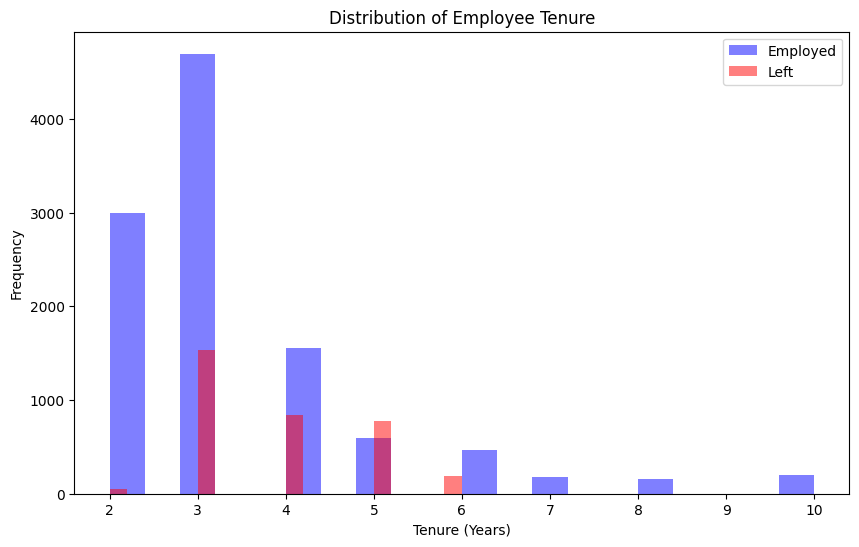

In [9]:

plt.figure(figsize=(10, 6))
plt.hist(df[df['status'] == 'Employed']['tenure'], bins=20, alpha=0.5, label='Employed', color='blue')
plt.hist(df[df['status'] == 'Left']['tenure'], bins=20, alpha=0.5, label='Left', color='red')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Tenure')
plt.legend()
plt.show()

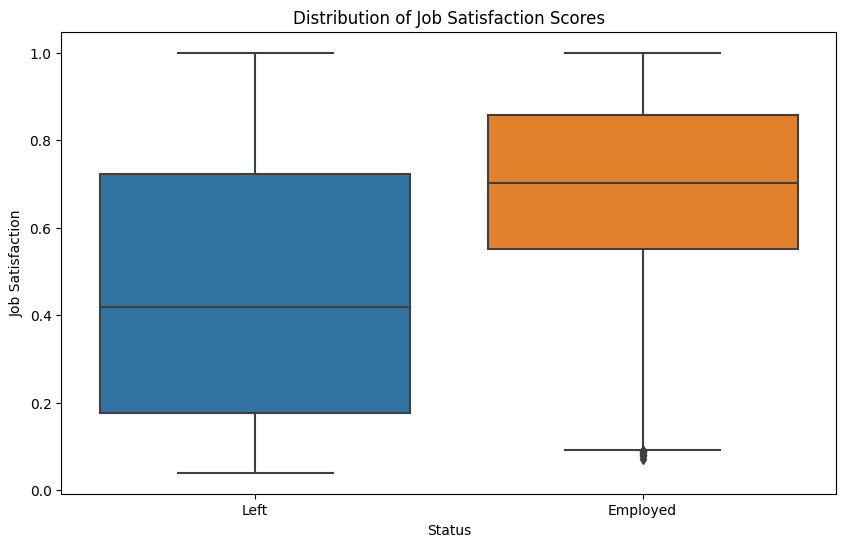

In [10]:
# Create a boxplot to examine job satisfaction scores among employees who left and those who are still employed
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction', data=df)
plt.xlabel('Status')
plt.ylabel('Job Satisfaction')
plt.title('Distribution of Job Satisfaction Scores')
plt.show()

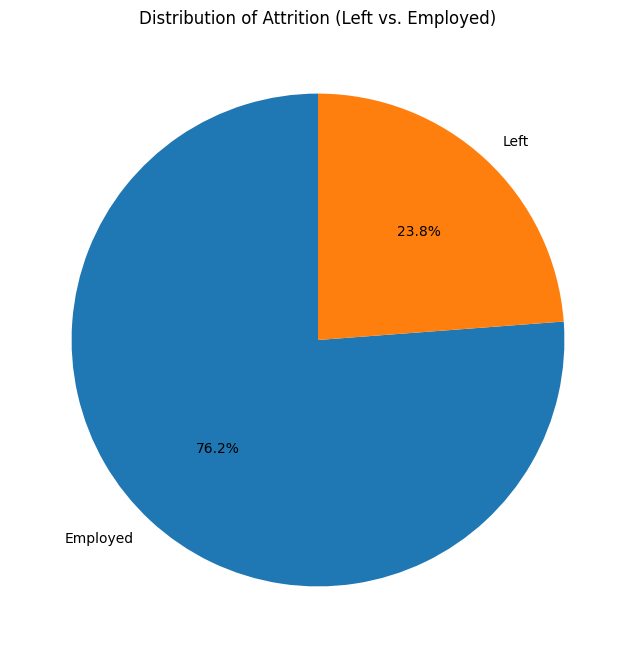

In [11]:
# Generate a pie chart to show the distribution of attrition
attrition_counts = df['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attrition (Left vs. Employed)')
plt.show()

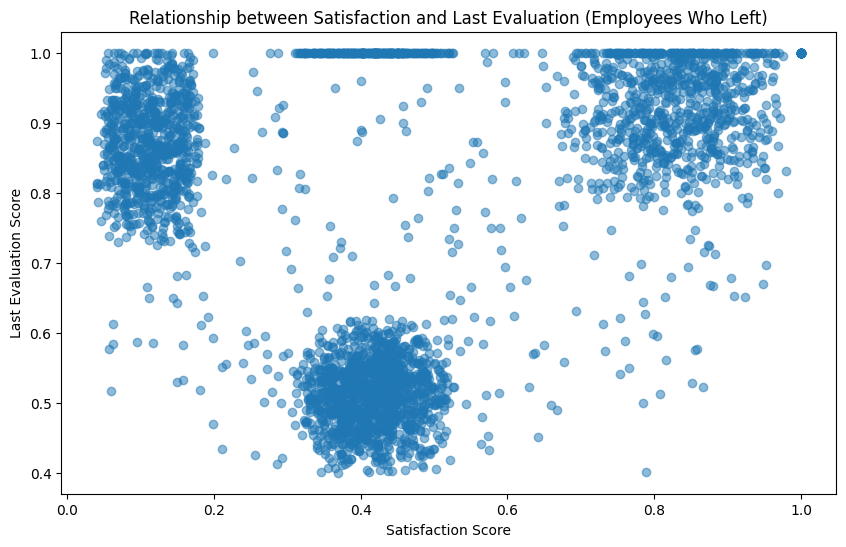

In [12]:
# Create a scatter plot to explore the relationship between satisfaction and last evaluation scores for employees who left
left_employees = df[df['status'] == 'Left']
plt.figure(figsize=(10, 6))
plt.scatter(left_employees['satisfaction'], left_employees['last_evaluation'], alpha=0.5)
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Relationship between Satisfaction and Last Evaluation (Employees Who Left)')
plt.show()

In [13]:

features = ['tenure', 'satisfaction', 'n_projects']
X = df[features]
y = df['status']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Split the dataset into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a decision tree classifier (Gini criterion)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

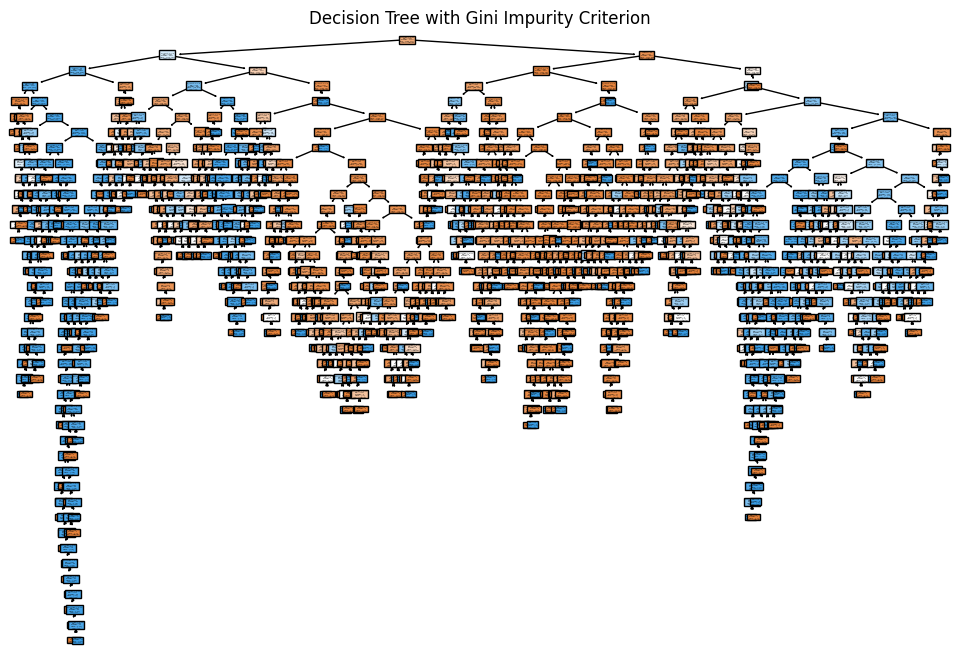

In [15]:
# Plot the decision tree (Gini criterion)
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=features, class_names=['Employed', 'Left'])
plt.title("Decision Tree with Gini Impurity Criterion")
plt.show()

In [16]:

# Evaluate the model on the test set
accuracy_gini = clf_gini.score(X_test, y_test)
print(f"Accuracy (Gini): {accuracy_gini:.2f}")

# Create and fit a decision tree classifier (Entropy criterion)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)

Accuracy (Gini): 0.93


DecisionTreeClassifier(criterion='entropy')

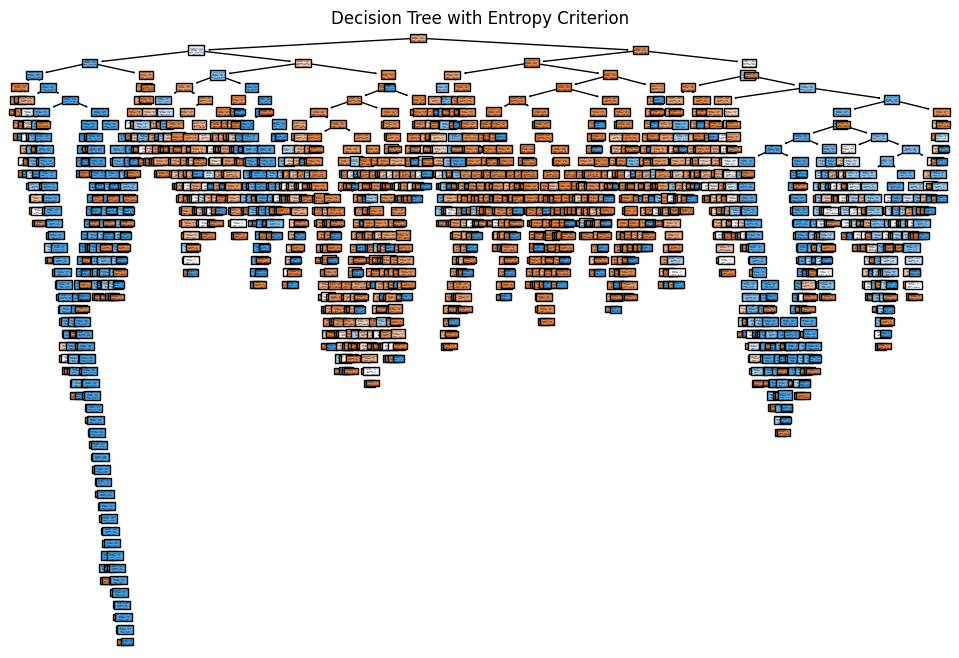

Accuracy (Entropy): 0.93


In [17]:

# Plot the decision tree (Entropy criterion)
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=features, class_names=['Employed', 'Left'])
plt.title("Decision Tree with Entropy Criterion")
plt.show()

# Evaluate the model on the test set
accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_gini = clf_gini.predict(X_test)

# Predictions using the pruned Entropy criterion decision tree model
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluation metrics for Gini criterion model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='Left')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='Left')
f1_score_gini = f1_score(y_test, y_pred_gini, pos_label='Left')

# Evaluation metrics for Entropy criterion model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='Left')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='Left')
f1_score_entropy = f1_score(y_test, y_pred_entropy, pos_label='Left')

In [19]:
# Confusion matrices for both models
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini, labels=['Employed', 'Left'])
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy, labels=['Employed', 'Left'])

In [20]:

# Create a diverging bar chart to display confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ['Employed', 'Left']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

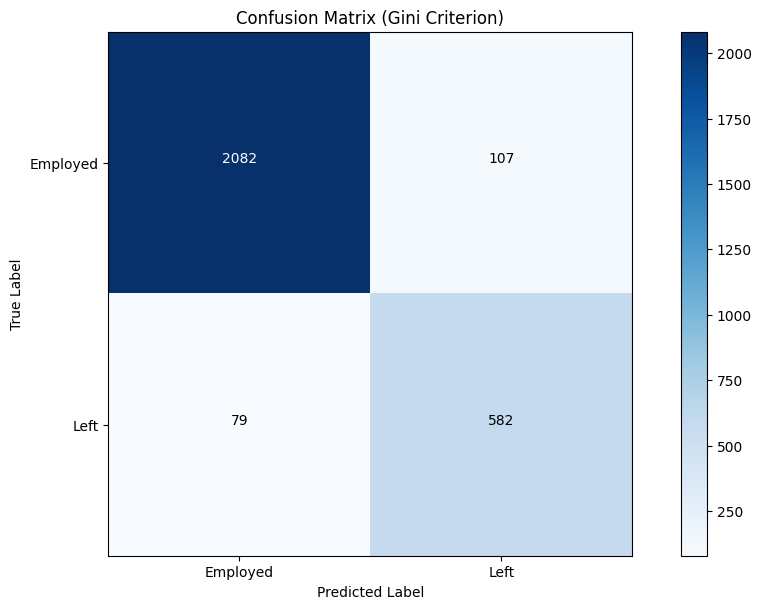

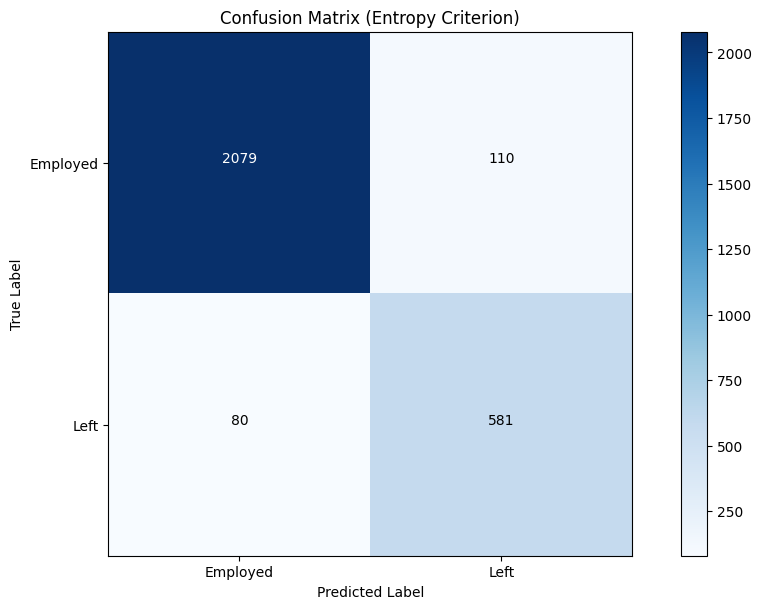

Metrics for Gini Criterion Model:
Accuracy: 0.93
Precision: 0.84
Recall: 0.88
F1-Score: 0.86

Metrics for Entropy Criterion Model:
Accuracy: 0.93
Precision: 0.84
Recall: 0.88
F1-Score: 0.86


In [21]:

import itertools
import numpy as np
plot_confusion_matrix(conf_matrix_gini, 'Confusion Matrix (Gini Criterion)')
plt.show()

plot_confusion_matrix(conf_matrix_entropy, 'Confusion Matrix (Entropy Criterion)')
plt.show()

# Print evaluation metrics
print("Metrics for Gini Criterion Model:")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1-Score: {f1_score_gini:.2f}\n")

print("Metrics for Entropy Criterion Model:")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entropy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1-Score: {f1_score_entropy:.2f}")

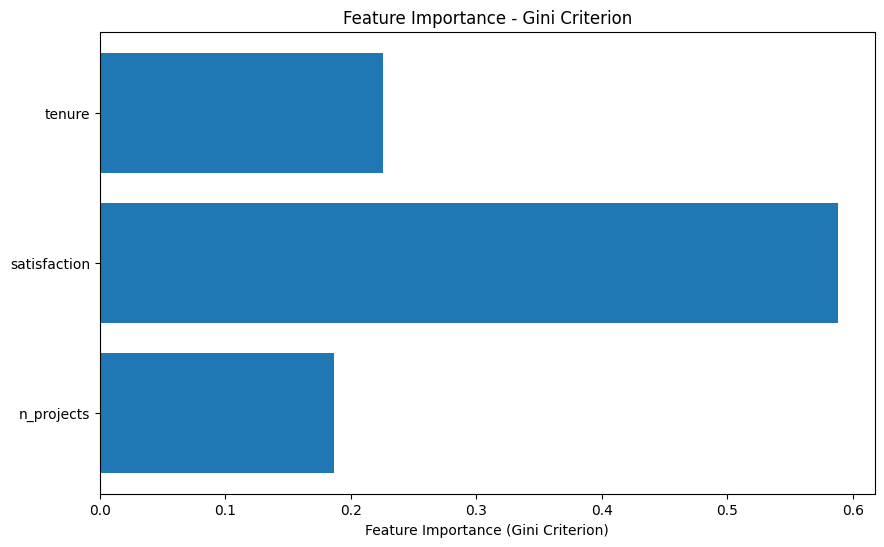

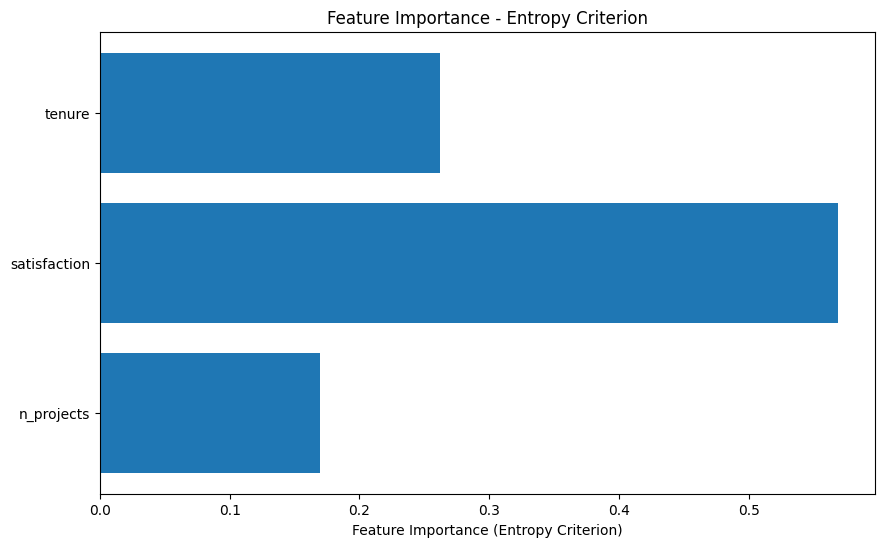

In [22]:
# Get feature importances for Gini criterion model
feature_importance_gini = clf_gini.feature_importances_

# Get feature importances for Entropy criterion model
feature_importance_entropy = clf_entropy.feature_importances_

# List of feature names
feature_names = ['tenure', 'satisfaction', 'n_projects']

# Create a bar chart for Gini criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_gini)
plt.xlabel('Feature Importance (Gini Criterion)')
plt.title('Feature Importance - Gini Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

# Create a bar chart for Entropy criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_entropy)
plt.xlabel('Feature Importance (Entropy Criterion)')
plt.title('Feature Importance - Entropy Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()